## Seaborn

[Seaborn](https://seaborn.pydata.org/) expande as funcionalidades da matplotlib (as diferenças são ilustradas [aqui](https://www.kdnuggets.com/2019/04/data-visualization-python-matplotlib-seaborn.html)).

* [Make your Data Talk!](https://towardsdatascience.com/make-your-data-talk-13072f84eeac).
* [Intermediate Python for Data Science](https://www.datacamp.com/courses/intermediate-python-for-data-science) (Data Camp)
* [Python Seaborn Tutorial For Beginners](https://www.datacamp.com/community/tutorials/seaborn-python-tutorial) (Data Camp)
* [PythonDataScienceHandbook](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)

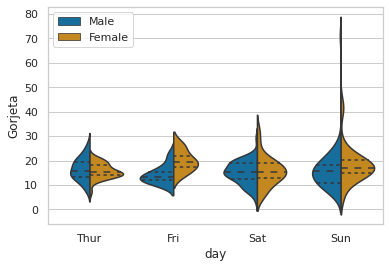

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset('tips')
tips['Gorjeta'] = 100 * tips.tip / tips.total_bill

sns.set(style='whitegrid', palette='colorblind')
sns.violinplot(x='day', y='Gorjeta', hue='sex', split=True, inner='quart', data=tips)
plt.legend(loc='upper left')

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

prefix = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/'

In [26]:
tips = pd.read_csv('{}tips.csv'.format(prefix) )

In [27]:
iris = pd.read_csv('{}iris.csv'.format(prefix))

In [28]:
flights = pd.read_csv('{}flights.csv'.format(prefix))

In [31]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Gráficos de dispersão (Scatterplots)

Nota: **sns.scatterplot** pode ser substituído sem perda por **sns.relplot**, uma **função mais genérica** que é basicamente um _wrapper_ para _sns.scatterplot_ e _sns.lineplot_.

Os gráficos de dispersão usam pontos no plano para representar valores em função de duas variáveis. Eles são úteis quando se deseja observar uma relação entre essas duas variáveis no dataset. 
Por exemplo, suponha que queremos saber se existe uma relação entre o preço final da conta de um restaurante e a gorjeta dada ao garçom. Podemos usar um gráfico de dispersão para isso. 

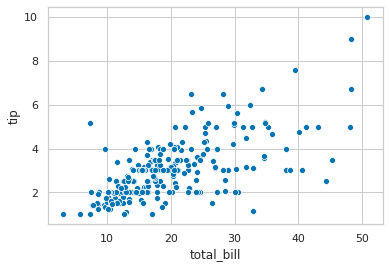

In [40]:
sns.scatterplot(
    x='total_bill',
    y='tip',
    data=tips,
)

Pela imagem acima, vemos claramente que, para a maior parte das amostras, as gorjetas crescem quando o valor da conta cresce. Também é possível acrescentar uma terceira variável a um gráfico de dispersão usando cores, símbolos ou tamanhos para representá-la.  


Combinando cores, símbolos e tamanhos, podemos representar ainda mais variáveis, por exemplo se quiséssemos observar a relação entre a conta e a gorjeta, considerando o sexo de quem pagou a conta e o horário da refeição.

Abaixo, os mesmos dados utilizados acima porém ao invés de scatter plot, utiliza-se um gráfico de linha, conectando assim todos os pontos por uma linha. Útil para quando um dos eixos indica _tempo_.

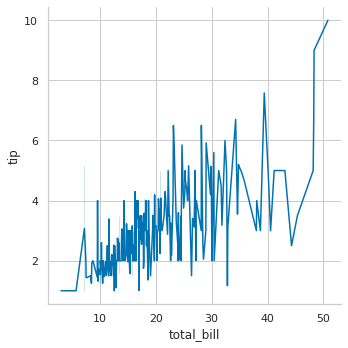

In [41]:
sns.relplot(
    x='total_bill',
    y='tip',
    data=tips,
    kind='line',
)

### O parâmetro "hue" especifica quais pontos devem ser coloridos com a mesma cor, de acordo com a coluna passada.

### O parâmetro "style" tem função análoga, porém no que diz respeito à forma do símbolo que representa o dado no gráfico.

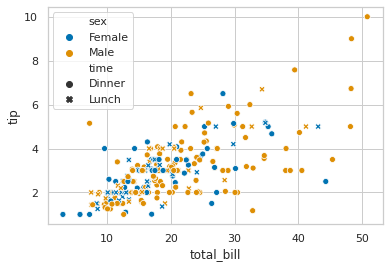

In [34]:
sns.scatterplot(
    x='total_bill',
    y='tip',
    hue='sex',
    style='time',
    data=tips
)

Se ainda por cima quiséssemos considerar o dia em que ocorreu a refeição, poderíamos acrescentar o parâmetro de tamanho e teríamos:

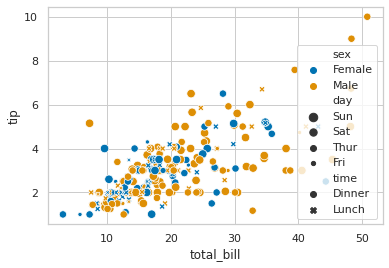

In [23]:
sns.scatterplot(
    x='total_bill',
    y='tip',
    hue='sex',
    style='time',
    size='day',
    data=tips
)

No entanto, é fácil ver que **a representação de mais de três variáveis em um gráfico de dispersão torna a interpretação dos dados mais complicada**, o que é o oposto do que queremos. Por isso, os parâmetros de cores, símbolos e tamanhos deve ser usados com cuidado, sempre com o objetivo de facilitar o entendimento dos dados.


Os gráficos de dispersão também podem ser usados para identificar padrões nos dados que permitam o agrupamento de amostras semelhantes, em relação às variáveis consideradas. Por exemplo, se considerarmos o comprimento e largura da pétala de uma amostra na base Iris, obtemos a divisão do conjunto em dois grupos, que nesse caso sabemos serem duas espécies diferentes. 

In [25]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


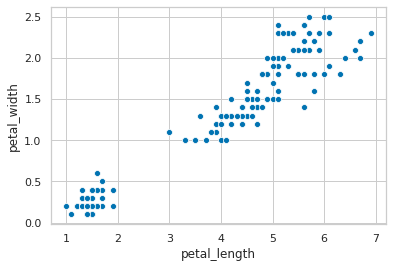

In [24]:
sns.scatterplot(
    x='petal_length',
    y='petal_width',
    data=iris
)

Observações:

    + as relações mostradas no gráfico de dispersão podem não ser causais, mas apenas de correlação
        * exemplo: diminuição de temperatura do ar e aumentos de casos de gripe estão correlacionados 
                  negativamente; entretanto, a primeira não é causa direta da segunda sendo mais um dos
                  diversos fatores que influenciam nesta

# Boxplots
Quando se trabalha com grandes quantidades de dados, ou mesmo na casa dos milhares de instâncias, torna-se difícil a visualização por meio _scatterplots_. Uma das abordagens consiste na utilização de **Boxplots**; outra (dentre diversas mais), gráfico de barras. A seguir, encontra-se exemplo de utilização desse modo de representação dos dados.

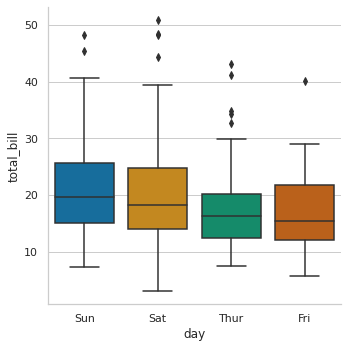

In [50]:
sns.catplot(
    x='day',
    y='total_bill',
    kind='box',
    data=tips,
)

**Boxplots** devem ser utilizados quando se deseja visualizar relações entre variáveis categóricas e contínuas.

Este tipo de gráfico é especialmente útil para a detecção de _outliers_ , além de exibir medidas estatísticas chamadas _quartis_ , os quais dividem os dados em 25\%, 50\% e 75\%. A exemplo, tome o dia _Sun_. Neste dia da semana: 
  - 75\% das contas foram abaixo de pouco mais de 40 unidades monetárias (u.m.)
  - 50% foram de no máximo aproximadamente 26 u.m.
  - 25% das contas foram abaixo de aproximadamente 7 u.m.
  - houve duas ocasiões nas quais a conta passou de aproximadamente 41 u.m.

Note-se também que, quanto mais pontos são plotados, a variância tende a aumentar. Isso pode ser útil por exemplo para a escolha de algoritmos de aprendizagem de máquina: uns são sensíveis a isso, outros mais robustos.


# Gráficos de barra

Os gráficos de barra usam retângulos de diferentes tamanhos para representar valores numéricos associados a categorias. São úteis quando se quer comparar esses valores, porque as barras fornecem uma boa noção de diferença e proporção. Por exemplo, se quisermos comparar o valor das contas de um restaurante em diferentes horários de atendimento, teremos um gráfico assim: 

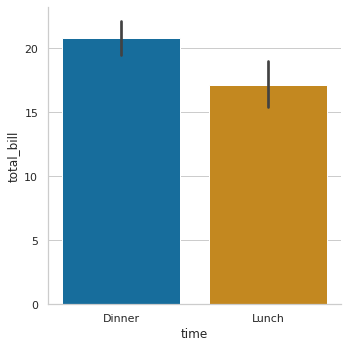

In [45]:
sns.catplot(
    x='time',
    y='total_bill',
    kind='bar',
    data=tips,
)

#### Observação
**sns.catplot** está para **sns.relplot** assim como **sns.barplot** está para **sns.scatterplot**: os primeiros são funções mais genéricas as quais por meio do parâmetro _type_ chamam funções específicas de plotagem.

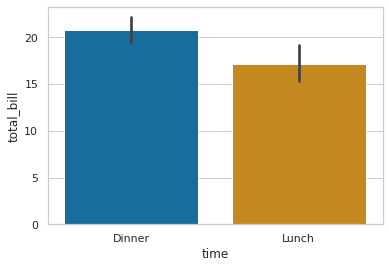

In [46]:
sns.barplot(
    x='time',
    y='total_bill',
    data=tips,
)

onde os valores numéricos associados às categorias são a média dos valores assumidos pelas amostras (as linhas pretas são o intervalo que essa categoria pode assumir). No gráfico acima, podemos observar de imediato que no jantar se gasta em média mais do que no almoço, embora essa diferença não seja tão grande.

Os gráficos em barra podem ser verticais ou horizontais, e ambas orientações servem para a maior parte dos problemas. Os gráficos horizontais muitas vezes são usados para facilitar a leitura do nome das categorias quando esses são muito longos, conforme exemplo abaixo. 

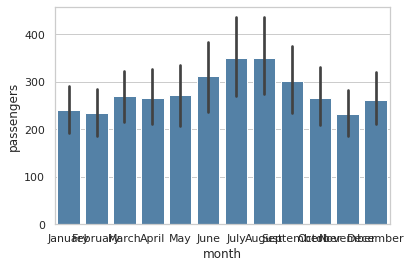

In [30]:
sns.barplot(
    x='month',
    y='passengers',
    data=flights,
    color='steelblue'
)

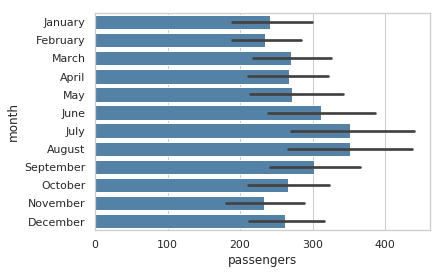

In [54]:
sns.barplot(
    y='month',
    x='passengers',
    data=flights,
    orient='h',
    color='steelblue'
)

Outros dois tipos de gráfico de barra são os gráficos de barras empilhadas e agrupadas. Em ambos os casos são usadas mais de uma barra para cada categoria, representando grupos internos das categorias. Eles são úteis quando se deseja comparar esses grupos internos, além do total da categoria. Por exemplo, se quisermos comparar o valor das contas de um restaurante em diferentes horários de atendimento, e comparar dentro de cada horário o valor das contas de homens e mulheres, podemos fazer usar os dois gráficos a seguir.

Text(0, 0.5, 'total_bill')

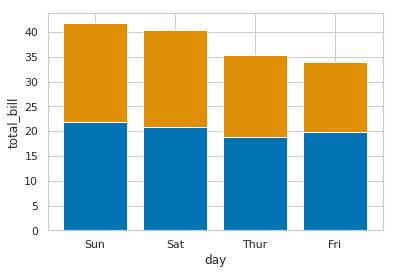

In [55]:
male_thur = np.mean([tips.loc[i,'total_bill'] for i in range(tips.shape[0]) if tips.loc[i, 'day'] == 'Thur' and tips.loc[i, 'sex'] == 'Male'])
male_fri = np.mean([tips.loc[i,'total_bill'] for i in range(tips.shape[0]) if tips.loc[i, 'day'] == 'Fri' and tips.loc[i, 'sex'] == 'Male'])
male_sat = np.mean([tips.loc[i,'total_bill'] for i in range(tips.shape[0]) if tips.loc[i, 'day'] == 'Sat' and tips.loc[i, 'sex'] == 'Male'])
male_sun = np.mean([tips.loc[i,'total_bill'] for i in range(tips.shape[0]) if tips.loc[i, 'day'] == 'Sun' and tips.loc[i, 'sex'] == 'Male'])
female_fri = np.mean([tips.loc[i,'total_bill'] for i in range(tips.shape[0]) if tips.loc[i, 'day'] == 'Fri' and tips.loc[i, 'sex'] == 'Female'])
female_thur = np.mean([tips.loc[i,'total_bill'] for i in range(tips.shape[0]) if tips.loc[i, 'day'] == 'Thur' and tips.loc[i, 'sex'] == 'Female'])
female_sat = np.mean([tips.loc[i,'total_bill'] for i in range(tips.shape[0]) if tips.loc[i, 'day'] == 'Sat' and tips.loc[i, 'sex'] == 'Female'])
female_sun = np.mean([tips.loc[i,'total_bill'] for i in range(tips.shape[0]) if tips.loc[i, 'day'] == 'Sun' and tips.loc[i, 'sex'] == 'Female'])
male = [male_sun, male_sat, male_thur, male_fri]
female = [female_sun, female_sat, female_thur, female_fri]

matplotlib.pyplot.bar(x=['Sun', 'Sat', 'Thur','Fri'], height=male)
matplotlib.pyplot.bar(x=['Sun', 'Sat', 'Thur','Fri'], height=female, bottom=male)
matplotlib.pyplot.xlabel('day')
matplotlib.pyplot.ylabel('total_bill')

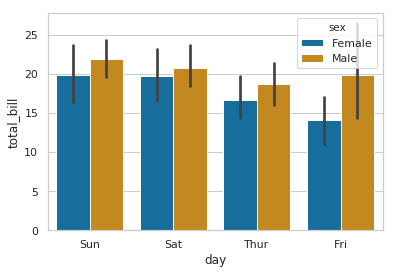

In [56]:
sns.barplot(x='day', y='total_bill', hue='sex', data=tips)

A escolha de qual desses dois tipos de gráficos usar depende do objetivo da visualização. Se o que se deseja é comparar a quantidade dos componentes das categorias **ao longo das diferentes categorias**, o gráfico de **barras agrupadas seria melhor**. Em outras palavras, é mais facil comparar o valor da conta das mulheres nos dois horários de atendimento pelo segundo gráfico, uma vez que as barras começam no mesmo ponto e só precisamos comparar suas alturas. Já no primeiro gráfico, para comparar esses valores temos que observar o comprimento das barras levando em consideração o nível de onde começam, o que dificulta a interpretação.

Por outro lado, no gráfico de barras agrupadas é difícil comparar os valores totais das categorias, uma vez que eles estão divididos por componentes. Portanto, se o objetivo é observar a **composição do grupo sem perder a comparação entre eles**, o melhor seria usar o gráfico de **barras empilhadas**.

Observações:
    
1 - Na biblioteca seaborn, os gráficos de barra são coloridos por padrão. No entanto, não é uma boa prática colorir gráficos de barra sem que as cores tenham significados porque isso polue o gráfico e torna a interpretação mais difícil. Compare o gráfico abaixo com os mesmo dados mostrados anteriormente. As cores trouxeram alguma informação?

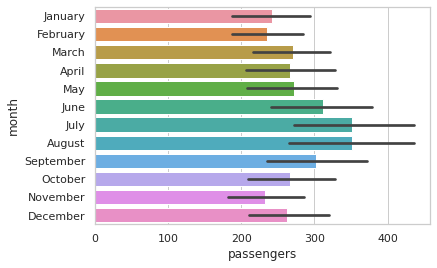

In [47]:
sns.barplot(
    y='month',
    x='passengers',
    orient='h',
    data=flights,
)

2 - É preciso ter cuidado com a quantidade de componentes das categorias na hora de usar um gráfico de barras agrupadas ou empilhadas, pois um pequeno aumento na quantidade de componentes pode tornar a interpretação do gráfico mais difícil.

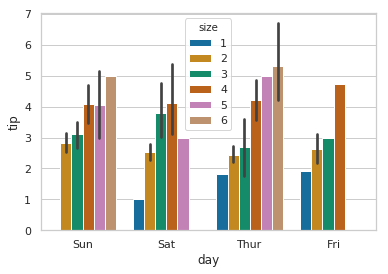

In [58]:
sns.barplot(x='day', y='tip', hue='size', data=tips)

# Referências

1. [Understanding boxplots](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)
2. [An introduction to seaborn](https://seaborn.pydata.org/introduction.html)
3. [Categorical](https://seaborn.pydata.org/tutorial/categorical.html)